예제로 사용된 네이버 영화 리뷰 데이터 외에 다른 텍스트 데이터를 이용하여 키워드 분석 하기
- 텍스트 데이터 다운로드
- 텍스트 데이터 전처리
- 단어 빈도
- 워드 클라우드, 트리맵으로 시각화하기

# 키워드 분석(Keyword Analysis)

## 한글 폰트 설정

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


## 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETTY_NAME="Ubuntu 18.04.5 LTS"
/etc/os-release:HOME_URL="https://www.ubuntu.com/"
/etc/os-release:SUPPORT_URL="https://help.ubuntu.com/"
/etc/os-release:BUG_REPORT_URL="https://bugs.launchpad.net/ubu

## 혐오 댓글 데이터




In [ ]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/train.tsv').readlines()
print(raw[:5])

[b'comments\tcontain_gender_bias\tbias\thate\n', b'(\xed\x98\x84\xec\x9e\xac \xed\x98\xb8\xed\x85\x94\xec\xa3\xbc\xec\x9d\xb8 \xec\x8b\xac\xec\xa0\x95) \xec\x95\x8418 \xeb\x82\x9c \xeb\xa7\x88\xeb\xa5\xb8\xed\x95\x98\xeb\x8a\x98\xec\x97\x90 \xeb\x82\xa0\xeb\xb2\xbc\xeb\x9d\xbd\xeb\xa7\x9e\xea\xb3\xa0 \xed\x98\xb8\xed\x85\x94\xeb\xa7\x9d\xed\x95\x98\xea\xb2\x8c\xec\x83\x9d\xea\xb2\xbc\xeb\x8a\x94\xeb\x8d\xb0 \xeb\x88\x84\xea\xb5\xb0 \xea\xb3\x84\xec\x86\x8d \xec\xb6\x94\xeb\xaa\xa8\xeb\xb0\x9b\xeb\x84\xa4....\tFalse\tothers\thate\n', b'....\xed\x95\x9c\xea\xb5\xad\xec\xa0\x81\xec\x9d\xb8 \xeb\xaf\xb8\xec\x9d\xb8\xec\x9d\x98 \xeb\x8c\x80\xed\x91\x9c\xec\xa0\x81\xec\x9d\xb8 \xeb\xb6\x84...\xeb\x84\x88\xeb\xac\xb4\xeb\x82\x98 \xea\xb3\xb1\xea\xb3\xa0\xec\x95\x84\xeb\xa6\x84\xeb\x8b\xa4\xec\x9a\xb4\xeb\xaa\xa8\xec\x8a\xb5...\xea\xb7\xb8\xeb\xaa\xa8\xec\x8a\xb5\xeb\x92\xa4\xec\x9d\x98 \xec\x8a\xac\xed\x94\x94\xec\x9d\x84 \xeb\xaf\xb8\xec\xb2\x98 \xec\x95\x8c\xec\xa7\x80\xeb\xaa\xbb\xed\x96\x

In [ ]:
raw = [x.decode() for x in raw[1:]]

comments = []
for i in raw:
  comments.append(i.split('\t')[0])

print(comments[:5])

['(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네....', '....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을 미처 알지못했네요ㅠ', '...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래야, 공정한 사회지...심은대로 거두거라...', '1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데', '1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각이 없노']


## 형태소 분석을 이용한 명사 추출


In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for comment in comments:
  for noun in tagger.nouns(comment):
    nouns.append(noun)

nouns[:10]

['현재', '호텔', '주인', '심정', '난', '하늘', '날벼락', '호텔', '누군', '추모']

### 불용어(Stopwords) 사전 만들기


In [ ]:
stop_words = "전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(' ')
print(stop_words)

['전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


### 불용어를 제외하여 형태소 분석 수행

In [ ]:
nouns = []
for comment in comments:
  for noun in tagger.nouns(comment):
    if noun not in stop_words:
      nouns.append(noun)

nouns[:10]

['현재', '호텔', '주인', '심정', '하늘', '날벼락', '호텔', '누군', '추모', '한국']

## 단어 빈도수 측정

In [ ]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'ㄷ': 160,
 '결혼': 240,
 '기사': 227,
 '기자': 88,
 '나라': 93,
 '나이': 140,
 '남': 144,
 '남자': 340,
 '남편': 93,
 '너': 101,
 '년': 215,
 '놈': 98,
 '누구': 90,
 '니': 135,
 '대': 114,
 '댓글': 161,
 '데': 120,
 '돈': 226,
 '둘': 142,
 '드라마': 217,
 '딸': 97,
 '때문': 93,
 '명': 90,
 '문제': 107,
 '방송': 153,
 '배우': 132,
 '사람': 559,
 '사랑': 112,
 '살': 91,
 '생각': 195,
 '씨': 253,
 '애': 305,
 '얼굴': 209,
 '엄마': 108,
 '여자': 574,
 '연기': 250,
 '연예인': 202,
 '욕': 115,
 '우리': 93,
 '응원': 122,
 '이': 134,
 '이상': 108,
 '인생': 106,
 '자기': 101,
 '정도': 130,
 '지': 115,
 '팬': 109,
 '플': 167,
 '하나': 168,
 '한국': 115}

## 단어 빈도 시각화

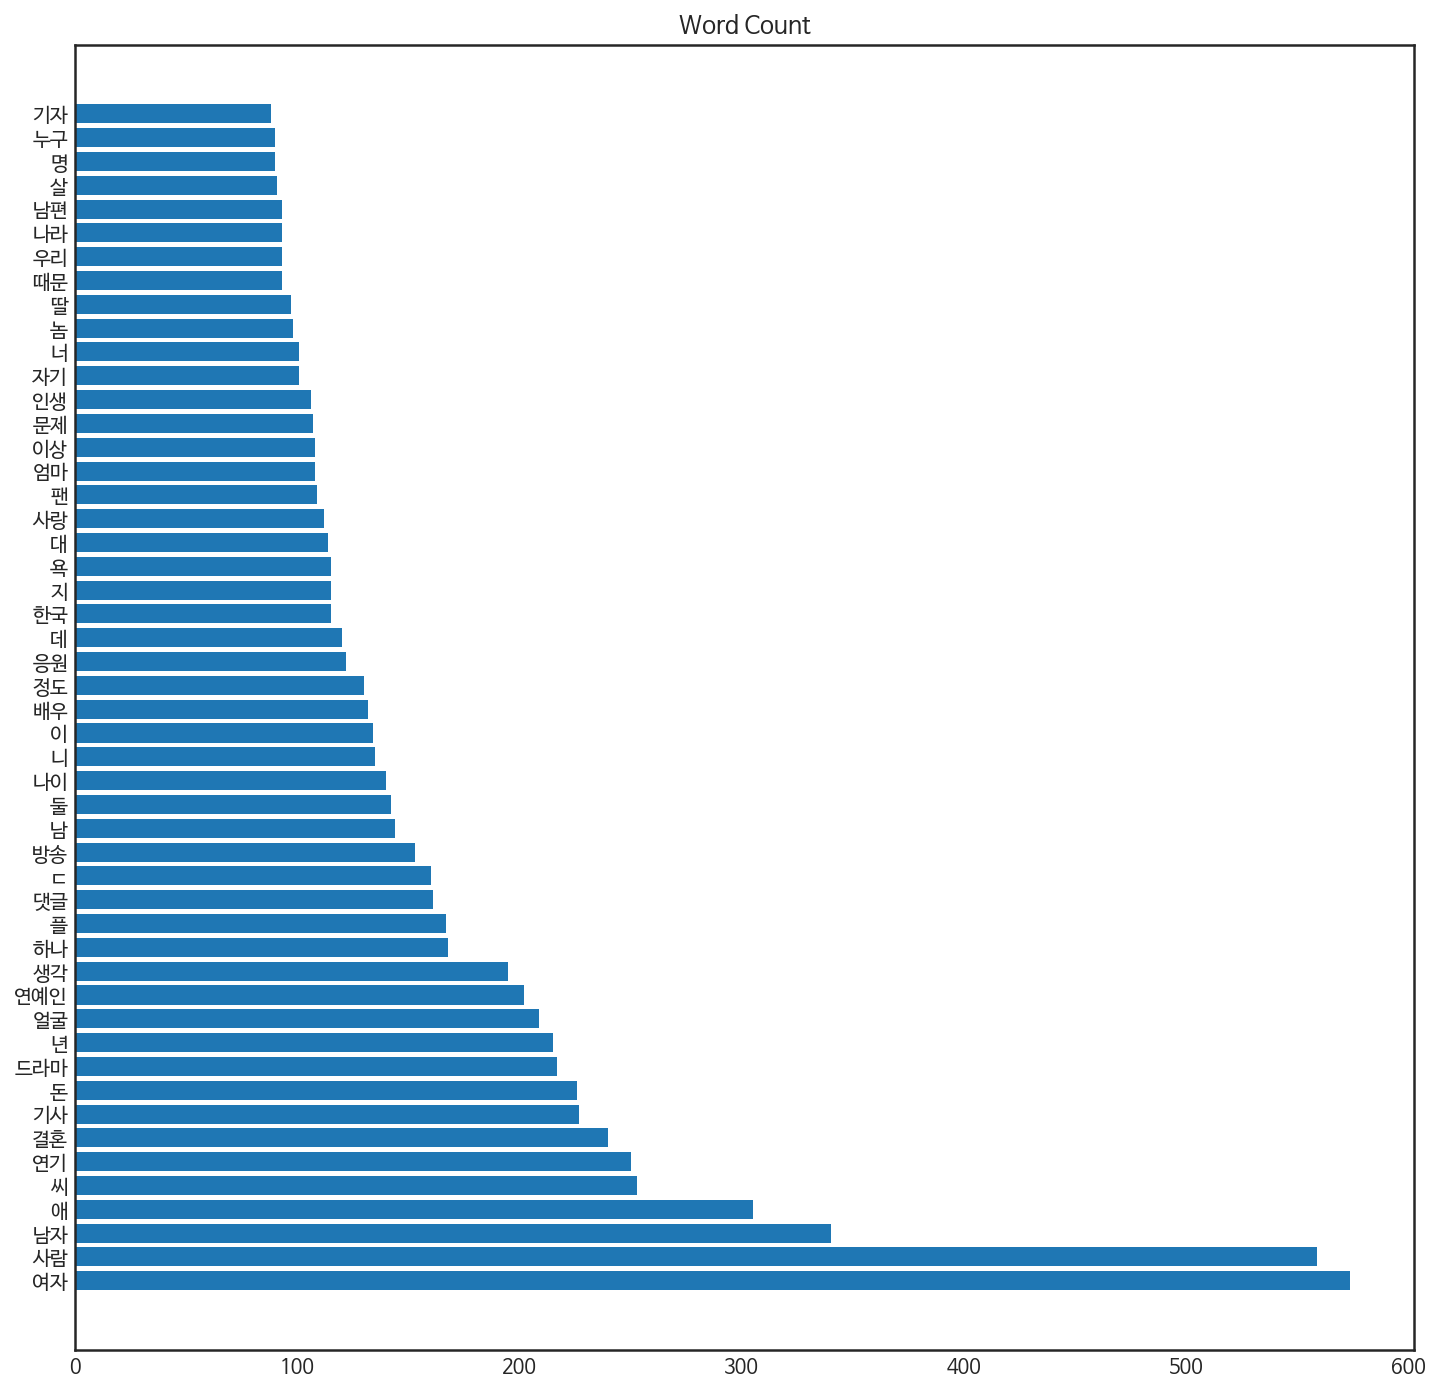

In [ ]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## 워드클라우드(WordCloud)

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

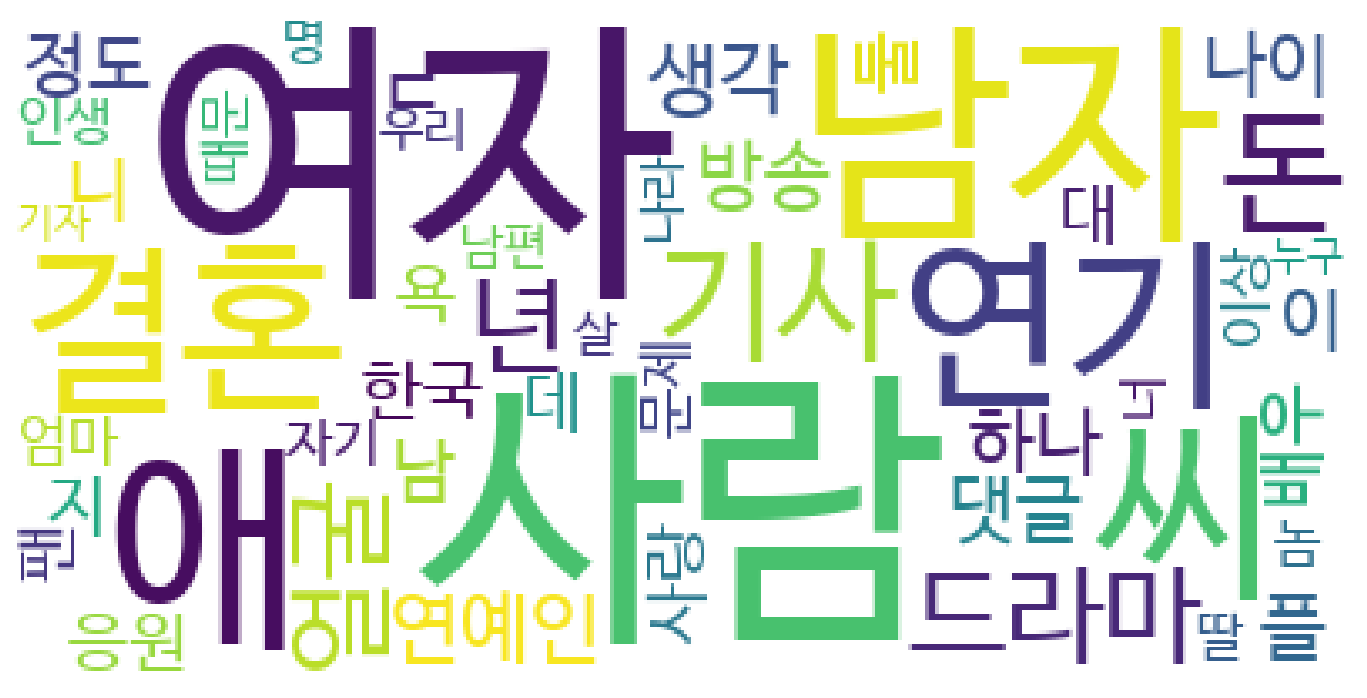

In [ ]:
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## squarify 트리맵 시각화

In [ ]:
!pip install squarify

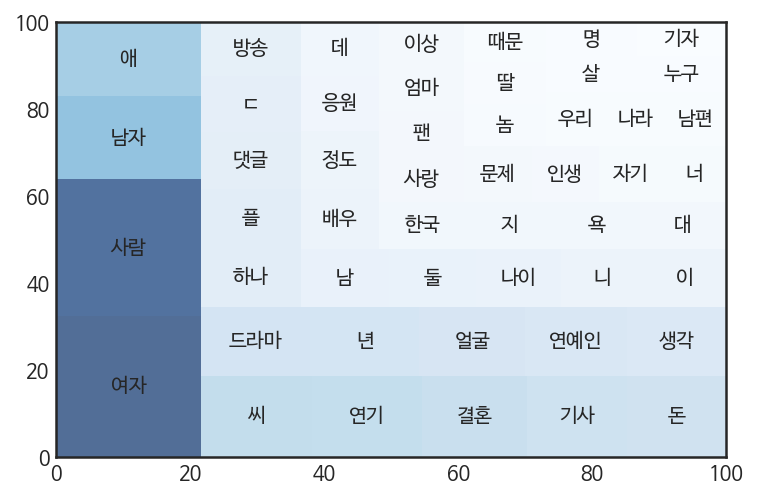

In [ ]:
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7);